# Logistic Regression - Transparency

## Describe the dataset

Data from :https://www.kaggle.com/machinoai/churn-datasets

There are 10000 objects and 12 features in the Customer Churn Dataset. This database includes customer's basic information and record. After analyzing all features, we can predict which fatal reason may cause a customer to churn (likely to leave).<br>
Attribute Information:<br>
CustomerId:	Customer's account ID<br>
Surname: Customer's surname<br>
CreditScore: Customer's credit score<br>
Geography: Country (France/Germany/Spain)<br>
Gender: Customer's gender (Female:0/Male:1)<br>
Age: Customer's age<br>
Tenure: Number of years customer has been with the bank<br>
Balance: Customer's account balance<br>
NumOfProducts: Number of bank products used by customer<br>
HasCrCard: Does customer have a credit card?<br>
IsActiveMember: Is the customer an active member?<br>
EstimatedSalary: Customer's estimated salary<br>

Classification:<br>
Exited: Did the customer leave the bank?(0 for not exit,1 for exit)<br>
*note: class distribution[not_exit:negative,exit:positive]

## Load the dataset

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:,3:13]
Y = dataset.iloc[:,13]

## Binarize the categorial features

In [58]:
X = pd.get_dummies(X, columns=["Geography"], prefix=["Geography"])
cleanup_nums = {"Gender":  {"Female": 0, "Male": 1}}
X.replace(cleanup_nums, inplace=True)

In [59]:
feature_name=list(X)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33, random_state = 0)

## Important features
### 1.L2-regularized

In [60]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression(penalty = "l2")
logistic.fit(x_train, y_train)
y_pred = logistic.predict(x_test)
print("The L2 accuracy_score of train set", logistic.score(x_train,y_train))
print("The L2 accuracy_score of test set", logistic.score(x_test,y_test))
feature_list = abs(logistic.coef_[0])
feature_sorted_index = np.argsort(feature_list)[::-1][:10]
print("L2 Logistic Regression-top 10 feature")
for i, value in enumerate(feature_sorted_index):#i means number of features , value means value of i-th feature
        print((feature_name[value],logistic.coef_[0,value])) 

The L2 accuracy_score of train set 0.794925373134
The L2 accuracy_score of test set 0.779090909091
L2 Logistic Regression-top 10 feature
('Age', 0.045007097338804002)
('Tenure', -0.026078756871406546)
('IsActiveMember', -0.012607835787691563)
('Gender', -0.0091234009356730757)
('Geography_France', -0.0082120212964390347)
('Geography_Germany', 0.0076196689018464339)
('NumOfProducts', -0.0069637990350454992)
('CreditScore', -0.0049483587613059297)
('Geography_Spain', -0.0026433163516644217)
('HasCrCard', -0.0025501936828407393)


### 2.L1-regularized

In [61]:
logistic = linear_model.LogisticRegression(penalty = "l1")
logistic.fit(x_train, y_train)
y_pred = logistic.predict(x_test)
print("The L1 accuracy_score of train set", logistic.score(x_train,y_train))
print("The L1 accuracy_score of test set", logistic.score(x_test,y_test))
feature_list = abs(logistic.coef_[0])
feature_sorted_index = np.argsort(feature_list)[::-1][:10]
print("L1 Logistic Regression-top 10 feature")
for i, value in enumerate(feature_sorted_index):#i means number of features , value means value of i-th feature
        print((feature_name[value],logistic.coef_[0,value]))

The L1 accuracy_score of train set 0.809701492537
The L1 accuracy_score of test set 0.807575757576
L1 Logistic Regression-top 10 feature
('IsActiveMember', -0.97866730027976745)
('Geography_France', -0.81694440884118413)
('Geography_Spain', -0.68926512053001143)
('Gender', -0.52821445125721833)
('NumOfProducts', -0.16969522646764532)
('Age', 0.070541818423487043)
('HasCrCard', -0.03967391182661105)
('Tenure', -0.028503364124860601)
('CreditScore', -0.0010080180970631957)
('Balance', 2.932373823373271e-06)


### 3.DecisionTreeClassifier

DT accuracy_score of train set 0.832686567164
DT accuracy_score of test set 0.827878787879


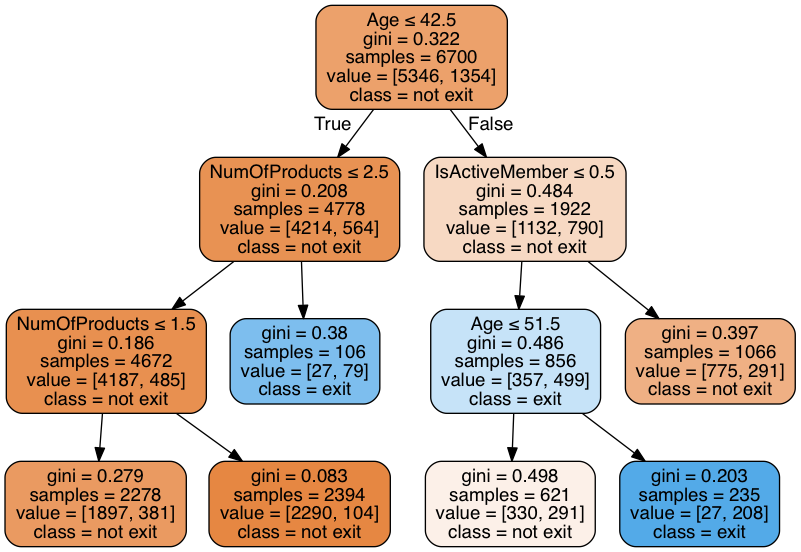

In [62]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=6,min_impurity_decrease=0.005)
clf = clf.fit(x_train,y_train)
print("DT accuracy_score of train set", clf.score(x_train,y_train))
print("DT accuracy_score of test set", clf.score(x_test,y_test))

import pydotplus 
from IPython.display import Image 
classname=['not exit','exit']
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=feature_name,
                         class_names = classname,
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

### 4.Discuss the result

<li>Regarding the accuracy in each experiment, DecisionTree has the best performance for both train and test set, the second-best one is L1-LR, and the worse one is L2-LR.
<li>Based on feature selection, L2-LR gets smaller weight than L1-LR. For example, feature "Age" has the most highest weight,0.045, in L2-LR. However, in L1-LR experiment, feature "IsActiveMember" gets -0.979, the most highest weight in absolute value.
<li>As we can see from top 10 feature of L1-LR, all features except "age" have strong reverse relevent.
<li>Unfortunately, Only L2-LR pick up the top 1 feature as the first node of DT - Age.








### 5.Standarlization

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scale = sc.fit_transform(X)

### 6.Repeat steps 1-4
#### 1.L2-regularized

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scale,Y,test_size = 0.33, random_state = 0)
logistic = linear_model.LogisticRegression(penalty = "l2")
logistic.fit(x_train, y_train)
y_pred = logistic.predict(x_test)
print("The L2 accuracy_score of train set", logistic.score(x_train,y_train))
print("The L2 accuracy_score of test set", logistic.score(x_test,y_test))
feature_list = abs(logistic.coef_[0])
feature_sorted_index = np.argsort(feature_list)[::-1][:10]
print("L2 Logistic Regression-top 10 feature")
for i, value in enumerate(feature_sorted_index):#i means number of features , value means value of i-th feature
        print((feature_name[value],logistic.coef_[0,value]))

The L2 accuracy_score of train set 0.810149253731
The L2 accuracy_score of test set 0.807575757576
L2 Logistic Regression-top 10 feature
('Age', 0.7452154141263273)
('IsActiveMember', -0.49085825414821288)
('Gender', -0.26308829589090477)
('Geography_Germany', 0.23156796451153097)
('Balance', 0.18573957858755594)
('Geography_France', -0.14163109343382838)
('NumOfProducts', -0.095743552123886272)
('CreditScore', -0.085141896502239939)
('Tenure', -0.080284657047098418)
('Geography_Spain', -0.068515728778953802)


#### 2.L1-regularized

In [65]:
from sklearn import linear_model

        
logistic = linear_model.LogisticRegression(penalty = "l1")
logistic.fit(x_train, y_train)
y_pred = logistic.predict(x_test)
print("The L1 accuracy_score of train set", logistic.score(x_train,y_train))
print("The L1 accuracy_score of test set", logistic.score(x_test,y_test))
feature_list = abs(logistic.coef_[0])
feature_sorted_index = np.argsort(feature_list)[::-1][:10]
print("L1 Logistic Regression-top 10 feature")
for i, value in enumerate(feature_sorted_index):#i means number of features , value means value of i-th feature
        print((feature_name[value],logistic.coef_[0,value]))

The L1 accuracy_score of train set 0.809850746269
The L1 accuracy_score of test set 0.807272727273
L1 Logistic Regression-top 10 feature
('Age', 0.74495865784365611)
('IsActiveMember', -0.49029484063630696)
('Geography_Germany', 0.3003768208144455)
('Gender', -0.2623269391839137)
('Balance', 0.18530259496056767)
('NumOfProducts', -0.094866855628376809)
('CreditScore', -0.084165553029890594)
('Tenure', -0.079291082265345383)
('Geography_France', -0.061437546729473422)
('EstimatedSalary', 0.028319991585460742)


#### 3.DecisionTreeClassifier

DT accuracy_score of train set 0.832686567164
DT accuracy_score of test set 0.827878787879


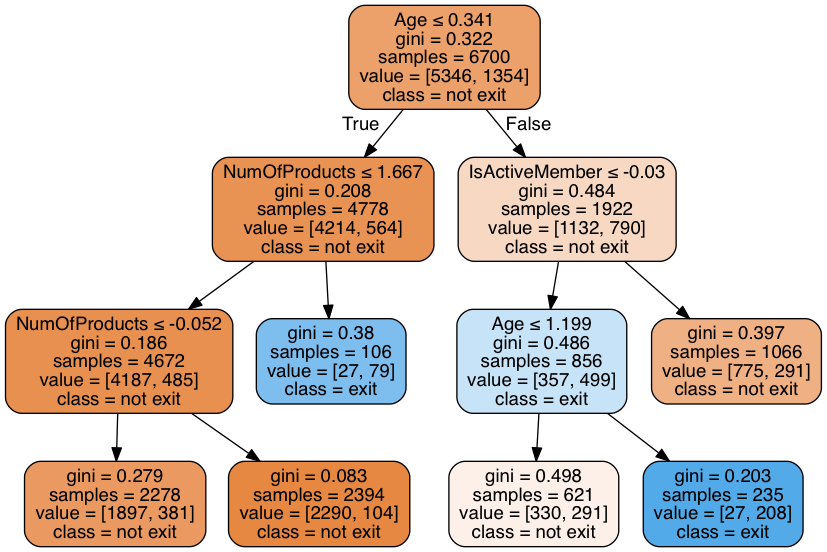

In [66]:
clf = tree.DecisionTreeClassifier(max_depth=6,min_impurity_decrease=0.005)
#clf = tree.DecisionTreeClassifier(max_depth=6)
clf = clf.fit(x_train,y_train)
print("DT accuracy_score of train set", clf.score(x_train,y_train))
print("DT accuracy_score of test set", clf.score(x_test,y_test))

import pydotplus 
from IPython.display import Image 
classname=['not exit','exit']
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=feature_name,
                         class_names = classname,
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

#### 4.Discuss the result

<li>After using StandardScaler to all features, the accuray of L2-LR in both train and test set increases a lot, especially in test set. Besides, the performance in L2-LR is slightly better than in L1-LR, regardless of train and test set.
<li>According to the graph of DT, standarlization doesn't make any positvie or negative influence on DT's performance. However, DT becomes less transparent since it's hard to understand the split value of each node. For example, it doesn't make sense the condition of first node, "Age" is less than 0.341.
<li>Interestingly, the order of feature selection of DT is more similar to L1-LR and L2-LR. In other words, L1-LR and L2-LR pick up the first two features, Age and IsActiveMember, which are the same as the first two node in DT.
<li>As we can see from top 10 feature of L1-LR and L2-LR, the order of first five features is almost the same between each other. Additionally, each weight of first five features is also the same, including the sign of the weight.


## Evidence
### Feature Weight List

In [67]:
logistic = linear_model.LogisticRegression(penalty = "l2")
logistic.fit(x_train, y_train)
y_pred = logistic.predict(x_test)
weight_bias = logistic.intercept_[0]
weight_list = logistic.coef_[0]

### Define total pos/neg evidence

In [69]:
def total_evidence(obj):
    positive_evidence_list = []
    negative_evidence_list = []
    total_positive_evidence = []
    total_negative_evidence = []
    for i, value in enumerate(obj):#i means number of features , value means value of i-th feature
        total_evidence_list.append(value*weight_list[i])
        if value*weight_list[i]>0 :
            positive_evidence_list.append(value*weight_list[i])
        else:
            negative_evidence_list.append(value*weight_list[i])
    total_positive_evidence = sum(positive_evidence_list)
    total_negative_evidence = sum(negative_evidence_list)
    if weight_bias>0:
        total_positive_evidence+=weight_bias
    else:
        total_negative_evidence+=weight_bias
    return(total_negative_evidence,total_positive_evidence)

### Define top 3 features with most of pos/neg evidence

In [70]:
def find_top_feature(obj):
    count = 0;
    feature_negative_index =[]
    feature_positive_index =[]
    feature_positive_index= np.argsort(total_evidence_list)[::-1][:3]
    feature_negative_index = np.argsort(total_evidence_list)[::1][:3]
    print('(d)top 3 features values that contribute most to the positive evidence')
    for i,value in enumerate(feature_positive_index):
        if total_evidence_list[value]>0:
            print("\t",feature_name[value],"\tvalue:",obj[value],"evidence:",total_evidence_list[value])
        else:
            count+=1;
    if count!=0:
        print("There are only",3-count,"features in positive evidence list")
    print('(e)top 3 features values that contribute most to the negative evidence')
    count = 0;
    for i,value in enumerate(feature_negative_index):
        if total_evidence_list[value]<0:
            print("\t",feature_name[value],"\tvalue:",obj[value],"evidence:",total_evidence_list[value])
        else:
            count+=1
    if count!=0:
        print("There are only",3-count,"features in negative evidence list")


### 1.The most positive object with respect to the probabilities

In [71]:
total_evidence_list = []
predict_proba = logistic.predict_proba(x_test)


positive_object_index = np.argmax(predict_proba[:,1])
a_obj = x_test[positive_object_index,]
total = total_evidence(a_obj)
print('(a)the total positive evidence',total[1])
print('(b)the total negative evidence',total[0])
print("(c)probability distribution",predict_proba[positive_object_index,])
find_top_feature(a_obj)

(a)the total positive evidence 3.8928468911
(b)the total negative evidence -1.68005223003
(c)probability distribution [ 0.09860739  0.90139261]
(d)top 3 features values that contribute most to the positive evidence
	 Age 	value: 3.05877155323 evidence: 2.27944370976
	 IsActiveMember 	value: -1.0306701134 evidence: 0.505912932466
	 Geography_Germany 	value: 1.72790383241 evidence: 0.400127173342
(e)top 3 features values that contribute most to the negative evidence
	 Tenure 	value: 0.341351950123 evidence: -0.027405324248
	 HasCrCard 	value: 0.646091668153 evidence: -0.0115584318487
There are only 2 features in negative evidence list


### 2.The most negative object with respect to the probabilities

In [72]:
total_evidence_list = []
negetive_object_index = np.argmax(predict_proba[:,0])
b_obj = x_test[negetive_object_index,]
total = total_evidence(b_obj)
print('(a)the total positive evidence',total[1])
print('(b)the total negative evidence',total[0])
print("(c)probability distribution",predict_proba[negetive_object_index,])
find_top_feature(b_obj)

(a)the total positive evidence 0.0709937865426
(b)the total negative evidence -4.5869605153
(c)probability distribution [ 0.98918521  0.01081479]
(d)top 3 features values that contribute most to the positive evidence
	 Geography_Spain 	value: -0.573809154134 evidence: 0.0393149523755
	 HasCrCard 	value: -1.54776798602 evidence: 0.0276892144966
	 CreditScore 	value: -0.0468584778399 evidence: 0.0039896196705
(e)top 3 features values that contribute most to the negative evidence
	 Age 	value: -1.99496875393 evidence: -1.48668146613
	 IsActiveMember 	value: 0.970242550937 evidence: -0.476251564653
	 Gender 	value: 0.912419149523 evidence: -0.240046799186


### 3.The object that has the largest positive evidence

In [73]:
pos_evidence_testset_list = []
neg_evidence_testset_list = []
for x in range(0,len(x_test[:,0])):
    total_evidence_list = []
    total = total_evidence(x_test[x,])
    pos_evidence_testset_list.append(total[1])
    neg_evidence_testset_list.append(total[0])

    
largest_pos_evidence_index = np.argmax(pos_evidence_testset_list)
total_evidence_list = []
c_obj = x_test[largest_pos_evidence_index,]
total = total_evidence(c_obj)
print('(a)the total positive evidence',total[1])
print('(b)the total negative evidence',total[0])
print("(c)probability distribution",predict_proba[largest_pos_evidence_index,])
find_top_feature(c_obj)

(a)the total positive evidence 4.16467021756
(b)the total negative evidence -2.72291001463
(c)probability distribution [ 0.19127292  0.80872708]
(d)top 3 features values that contribute most to the positive evidence
	 Age 	value: 5.06119695796 evidence: 3.771681987
	 Balance 	value: 0.721659371986 evidence: 0.134040707636
	 NumOfProducts 	value: -0.91158349404 evidence: 0.0872782417769
(e)top 3 features values that contribute most to the negative evidence
	 IsActiveMember 	value: 0.970242550937 evidence: -0.476251564653
	 Gender 	value: 0.912419149523 evidence: -0.240046799186
	 Geography_France 	value: 0.997203909047 evidence: -0.141235080015


### 4.The object that has the largest negative evidence

In [74]:
largest_neg_evidence_index = np.argmin(neg_evidence_testset_list)
total_evidence_list = []
d_obj = x_test[largest_neg_evidence_index,]
total = total_evidence(d_obj)
print('(a)the total positive evidence',total[1])
print('(b)the total negative evidence',total[0])
print("(c)probability distribution",predict_proba[largest_neg_evidence_index,])
find_top_feature(d_obj)

(a)the total positive evidence 0.0709937865426
(b)the total negative evidence -4.5869605153
(c)probability distribution [ 0.98918521  0.01081479]
(d)top 3 features values that contribute most to the positive evidence
	 Geography_Spain 	value: -0.573809154134 evidence: 0.0393149523755
	 HasCrCard 	value: -1.54776798602 evidence: 0.0276892144966
	 CreditScore 	value: -0.0468584778399 evidence: 0.0039896196705
(e)top 3 features values that contribute most to the negative evidence
	 Age 	value: -1.99496875393 evidence: -1.48668146613
	 IsActiveMember 	value: 0.970242550937 evidence: -0.476251564653
	 Gender 	value: 0.912419149523 evidence: -0.240046799186


### 5.The most uncertain object

In [75]:
total_evidence_list = []
ratio = []
for x in range(0,len(predict_proba[:,0])):
    ratio.append( predict_proba[x,1]/predict_proba[x,0])
ratio = np.array(ratio)
new_ratio = np.abs(ratio-1)
neural_index = np.argmin(new_ratio)

e_obj = x_test[neural_index,]
total = total_evidence(e_obj)
print('(a)the total positive evidence',total[1])
print('(b)the total negative evidence',total[0])
print("(c)probability distribution",predict_proba[neural_index,])
find_top_feature(e_obj)

(a)the total positive evidence 1.8510544537
(b)the total negative evidence -1.85180758763
(c)probability distribution [ 0.50018828  0.49981172]
(d)top 3 features values that contribute most to the positive evidence
	 IsActiveMember 	value: -1.0306701134 evidence: 0.505912932466
	 Geography_Germany 	value: 1.72790383241 evidence: 0.400127173342
	 Age 	value: 0.388871013598 evidence: 0.28979267344
(e)top 3 features values that contribute most to the negative evidence
	 Tenure 	value: 1.0329077648 evidence: -0.0829266456581
	 NumOfProducts 	value: 0.807736562618 evidence: -0.0773355676854
	 EstimatedSalary 	value: -1.32365264915 evidence: -0.0388984685055
